In [1]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Result
0,41.00000,190.000000,7.4,67,5,1,0
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,0
3,18.00000,313.000000,11.5,62,5,4,0
4,42.12931,185.931507,14.3,56,5,5,1


In [2]:
df.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day', 'Result'], dtype='object')

In [3]:
df.shape

(153, 7)

In [4]:
df.describe()


,Ozone,Solar.R,Wind,Temp,Month,Day,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922,0.529412
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520,0.500773
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000,0.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000,1.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000,1.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000


In [5]:
#오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()


,Ozone,Solar.R,Wind,Temp,Month,Day
Result,,,,,,
0,20.902778,166.302702,11.270833,72.652778,6.972222,15.180556
1,60.997339,203.379334,8.790123,82.530864,7.012346,16.358025


In [6]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

In [7]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>]], dtype=object)

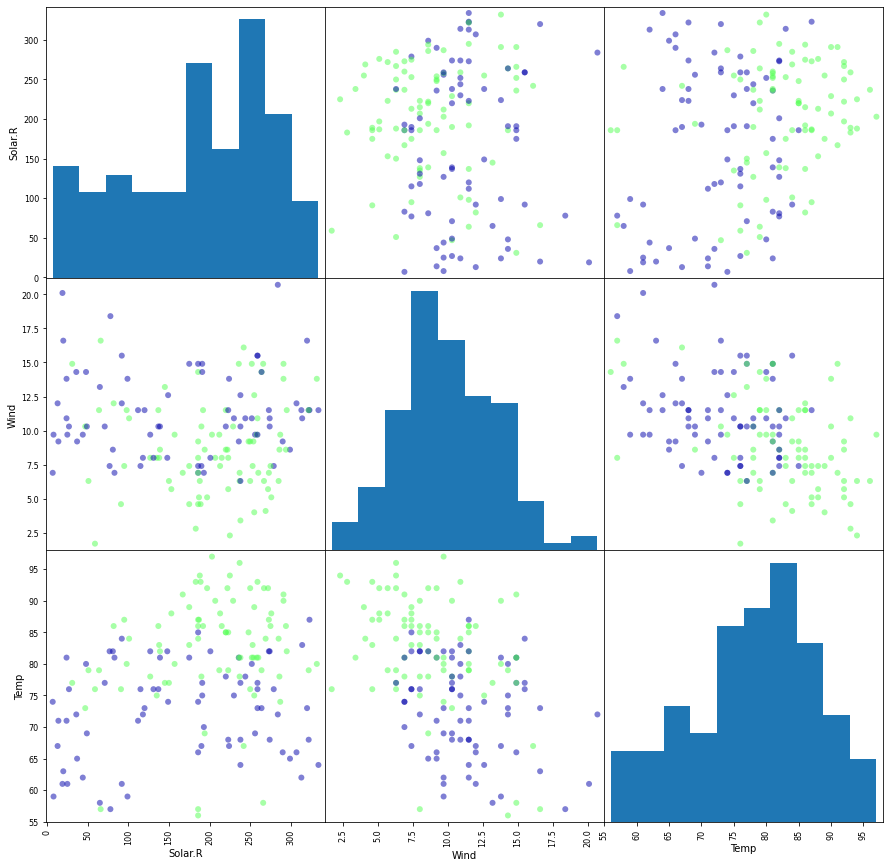

In [8]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [9]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [10]:
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [11]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)


In [12]:
df_samp["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0: 부족, 1: 정상)')

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

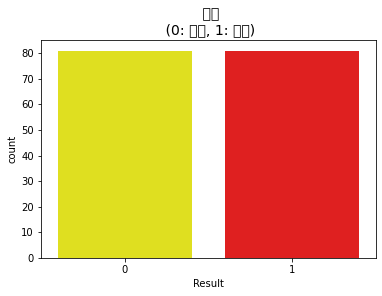

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]
sns.countplot('Result', data=df_samp, palette=colors)
plt.title(' 분류\n (0: 부족, 1: 정상)', fontsize=14)

In [14]:
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)


MLPClassifier(random_state=0)

In [17]:
import numpy as np
pred=model.predict(X_test)
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test)) 
print(" 검증용:",np.mean(pred == y_test))

 학습용: 0.7596899224806202
 검증용: 0.6666666666666666
 검증용: 0.6666666666666666


<AxesSubplot:>

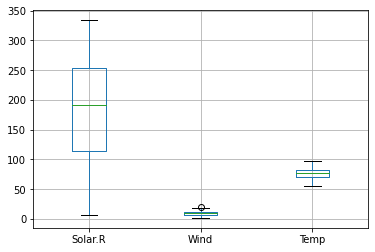

In [18]:
X_train.boxplot()

In [19]:
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0) 
std_on_train = X_train.std(axis=0)
# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)
# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training
# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training
print(" 특성별 최소값\n{0}".format(X_train_scaled.min(axis= 0)))
print(" 특성별 최대값\n{0}".format(X_train_scaled.max(axis= 0)))

 특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
 특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


<AxesSubplot:>

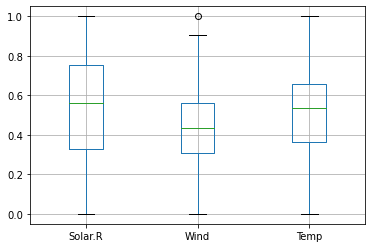

In [20]:
X_train_scaled.boxplot()

In [21]:
#표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=0, max_iter=3000)
model.fit(X_train_scaled, y_train)
print(" 학습용:",model.score(X_train_scaled, y_train)) 
print(" 검증용:",model.score(X_test_scaled, y_test))
#예측률이 향상됨


 학습용: 0.7441860465116279
 검증용: 0.7575757575757576


In [22]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
# pred=model.predict(X_test)
pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)


array([[11,  4],
       [ 4, 14]], dtype=int64)

In [25]:
df_cm=pd.DataFrame(confusion_matrix(y_test, pred), index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,11,4
1,4,14


<AxesSubplot:title={'center':'Confusion Matrix'}>

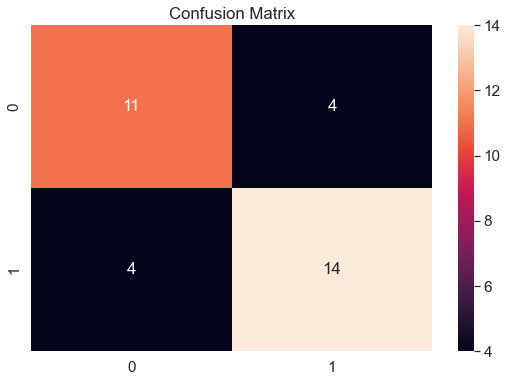

In [26]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자